In [1]:
# import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# set pandas display options
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',50)
pd.set_option('display.width',1000)

In [2]:
# read csv
rbwrte_df = pd.read_csv("rbwrte_feature_matrix.csv")

# create list of player specific columns
player_columns = ['year'
                 ,'week'
                 ,'player'
                 ,'short_name'
                 ,'position_name'
                 ,'pro_team'
                 ,'pro_team_abv']

# convert columns to category
rbwrte_df[player_columns] = rbwrte_df[player_columns].astype('category')
rbwrte_df.head(3)

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_att,rush_yrd,rush_td,rush_2pt_con,rec_tar,receptions,rec_yrd,rec_td,rec_2pt_con,fum_lost,yrd_per_rush,rush_share,total_off_share,target_share,yrd_per_catch,yards_after_catch,air_yards_ind,compl_rec_air_yrds,racr,adot,wopr,rush_5_yrd_ff,rush_yrd_100_199_ff,rush_yrd_200+_ff,rush_td_ff,rush_50_yrd_td_ff,rush_2pt_con_ff,receptions_ff,rec_5_yrd_ff,rec_yrd_100_199_ff,rec_yrd_200+_ff,rec_td_ff,rec_50_yrd_td_ff,rec_2pt_con_ff_ff,fum_lost_ff,actual_points
0,2018,1,David Johnson,D.Johnson,RB,Arizona Cardinals,ARI,9.0,37.0,1.0,0.0,9.0,5.0,30.0,0.0,0.0,0.0,4.111111,0.600000,0.28,0.257143,6.000000,20.0,7.0,10.0,4.285714,0.777778,0.409272,4.2,0.0,0.0,6.0,0.0,0.0,2.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,15.8
1,2018,1,Melvin Gordon,M.Gordon,RB,Los Angeles Chargers,LAC,15.0,64.0,0.0,1.0,13.0,9.0,102.0,0.0,0.0,0.0,4.000000,0.695652,0.32,0.250000,11.333333,119.0,-16.0,-17.0,-6.375000,-1.230769,0.351812,7.2,0.0,0.0,0.0,0.0,2.0,3.6,12.0,3.0,0.0,0.0,0.0,0.0,0.0,27.8
2,2018,1,Rob Gronkowski,R.Gronkowski,TE,New Engalnd Patriots,NE,0.0,0.0,0.0,0.0,8.0,7.0,123.0,1.0,0.0,1.0,0.000000,0.000000,0.00,0.205128,17.571429,21.0,107.0,102.0,1.149533,13.375000,0.541755,0.0,0.0,0.0,0.0,0.0,0.0,2.8,14.4,3.0,0.0,6.0,0.0,0.0,-2.0,24.2


In [3]:
# read csv
qb_df = pd.read_csv("qb_feature_matrix.csv")

# convert columns to category
qb_df[player_columns] = qb_df[player_columns].astype('category')
qb_df.head(3)

,year,week,player,short_name,position_name,pro_team,pro_team_abv,pass_comp,pass_incomp,pass_yrd,air_yards,pass_td,rdz_td,pass_2pt_con,pass_int,rush_att,rush_yrd,rush_td,rush_2pt_con,fum_lost,compl_rate,pass_yrd_per_att,air_yrd_per_att,adj_net_yrd_per_att,comp_air_yard,td_rate,td_to_att_ratio,int_to_td_ratio,total_to,yrd_per_rush,rush_share,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,qb_hit,sack,ep,epa,air_epa,comp_air_epa,qb_epa,air_wpa,comp_air_wpa,pass_comp_ff,pass_incomp_ff,pass_5_yrd_ff,pass_yrd_300_399_ff,pass_yrd_400+_ff,pass_td_ff,pass_50_yrd_td_ff,pass_2pt_con_ff,pass_int_ff,rush_5_yrd_ff,rush_yrd_100_199_ff,rush_yrd_200+_ff,rush_td_ff,rush_50_yrd_td_ff,rush_2pt_con_ff,fum_lost_ff,actual_points
0,2018,1,Matthew Stafford,M.Stafford,QB,Detroit Lions,DET,27.0,19.0,286.0,354.0,1.0,0.0,0.0,4.0,1.0,6.0,0.0,0.0,0.0,0.642857,6.809524,8.428571,3.476190,142.0,0.047619,0.047619,2.0,5.0,6.000000,0.066667,42.0,27.0,46.0,0.0,0.0,0.0,4.0,0.0,114.416126,-15.735498,26.638698,-0.097134,-15.735498,0.008817,0.008817,10.8,-3.8,5.7,0.0,0.0,6.0,0.0,0.0,-8.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,11.3
1,2018,1,Ben Roethlisberger,B.Roethlisberger,QB,Pittsburgh Steelers,PIT,23.0,18.0,335.0,382.0,1.0,0.0,0.0,3.0,3.0,16.0,0.0,0.0,2.0,0.605263,8.236842,10.052632,5.238095,100.0,0.026316,0.026316,3.0,5.0,5.333333,0.085714,42.0,4.0,45.0,0.0,0.0,0.0,5.0,4.0,65.470792,-6.626383,17.275068,3.820365,-6.626383,1.816574,0.917498,9.2,-3.6,6.7,3.0,0.0,6.0,0.0,0.0,-6.0,1.8,0.0,0.0,0.0,0.0,0.0,-4.0,13.1
2,2018,1,Matt Ryan,M.Ryan,QB,Atlanta Falcons,ATL,21.0,22.0,251.0,380.0,0.0,0.0,0.0,1.0,2.0,8.0,0.0,0.0,0.0,0.500000,5.357143,9.047619,4.478261,133.0,0.000000,0.000000,0.0,1.0,4.000000,0.111111,34.0,5.0,47.0,0.0,0.0,0.0,13.0,4.0,96.311492,-12.027826,35.290724,7.462745,-12.027826,-0.189742,0.200121,8.4,-4.4,5.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,7.6


In [4]:
# read csv
def_df = pd.read_csv("def_feature_matrix.csv")

# convert columns to category
def_df[player_columns] = def_df[player_columns].astype('category')
def_df.head(3)

,year,week,player,short_name,position_name,pro_team,pro_team_abv,def_pts_alw,def_tot_yrd_alw,def_st_int,def_st_fum,def_st_sack,def_st_safety,def_st_blk_kick,def_st_int_td,def_st_fum_ret_td,def_st_blk_td,def_st_kick_ret_td,def_st_punt_ret_td,rush_att_agst,rush_yrd_agst,rush_yrd_gained_agst,rush_td_agst,inc_pass_agst,comp_pass_agst,pass_yrd_agst,air_yrd_agst,yac_agst,pass_yrd_gained_agst,pass_td_agst,plays_agst,rsh_yrd_per_att_agst,compl_perc_agst,pass_yrd_per_att_agst,yrd_per_play_agst,compl_air_yrds_agst,racr_agst,adot_agst,net_yrd_per_att_agst,adj_net_yrd_per_att_agst,pass_td_to_att_ratio_agst,rdz_td_agst,td_rate_agst,int_to_td_ratio_agst,total_to,sack_yrd,num_penalty,penalty_yards,tot_drives_agst,drv_end_scr,drv_end_scr_perc,drv_end_to,drv_end_to_perc,shotgun_agst,no_huddle_agst,qb_drop_agst,qb_kneel_agst,qb_spike_agst,qb_scramble_agst,qb_hit_agst,ep_agst,epa_agst,air_epa_agst,comp_air_epa_agst,qb_epa_agst,air_wpa_agst,comp_air_wpa_agst,def_st_0_pts_alw_ff,def_st_1_6_pts_alw_ff,def_st_7_13_pts_alw_ff,def_st_14_17_pts_alw_ff,def_st_22_27_pts_alw_ff,def_st_28_34_pts_alw_ff,def_st_35_45_pts_alw_ff,def_st_46+_pts_alw_ff,def_st_0_99_yrd_alw_ff,def_st_100_199_yrd_alw_ff,def_st_200_299_yrd_alw_ff,def_st_350_399_yrd_alw,def_st_400_449_yrd_alw_ff,def_st_450_499_yrd_alw_ff,def_st_500_549_yrd_alw_ff,def_st_550+_yrd_alw_ff,def_st_int_ff,def_st_fum_ff,def_st_sack_ff,def_st_blk_kick_ff,def_st_safety_ff,def_st_int_td_ff,def_st_fum_ret_td_ff,def_st_blk_td_ff,def_st_kick_ret_td_ff,def_st_punt_ret_td_ff,actual_points
0,2018,1,Jaguars D/ST,J.D/ST,DEF,Jacksonville Jaguars,JAX,15.0,324.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,114.0,114.0,1.0,13.0,23.0,224.0,249.0,86.0,210.0,1.0,63.0,4.750000,0.638889,5.833333,5.142857,124.0,0.843373,6.916667,5.894737,5.236842,0.027778,0.0,0.031746,1.0,1.0,-14.0,5.0,73.0,12.0,4.0,0.333333,1.0,0.083333,33.0,5.0,39.0,0.0,0.0,0.0,6.0,49.355886,-11.798196,5.400742,-2.863654,-11.798196,0.087749,0.086177,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,21.0
1,2018,1,Ravens D/ST,R.D/ST,DEF,Baltimore Ravens,BAL,3.0,153.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,83.0,83.0,0.0,20.0,11.0,98.0,368.0,33.0,70.0,0.0,61.0,3.772727,0.354839,2.258065,2.508197,37.0,0.190217,11.870968,2.648649,0.216216,0.000000,0.0,0.000000,0.0,2.0,-28.0,4.0,38.0,15.0,1.0,0.066667,2.0,0.133333,39.0,11.0,39.0,0.0,0.0,0.0,9.0,31.496089,-27.864169,26.181205,1.746639,-27.864169,-0.004956,-0.004946,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,2018,1,Vikings D/ST,V.D/ST,DEF,Minnesota Vikings,MIN,16.0,327.0,3.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,90.0,90.0,0.0,15.0,15.0,261.0,368.0,144.0,237.0,2.0,61.0,3.600000,0.500000,7.900000,5.360656,93.0,0.644022,12.266667,7.909091,5.030303,0.066667,0.0,0.032787,1.5,3.0,-24.0,4.0,37.0,12.0,4.0,0.333333,4.0,0.333333,26.0,4.0,36.0,0.0,0.0,0.0,8.0,71.477030,-13.548580,35.605712,7.101346,-13.548580,0.077075,0.087416,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,25.0


In [5]:
# read csv
kr_df = pd.read_csv("kr_feature_matrix.csv")

# convert columns to category
kr_df[player_columns] = kr_df[player_columns].astype('category')
kr_df.head(3)

,year,week,player,short_name,position_name,pro_team,pro_team_abv,pat_con,pat_att,fg_con,fg_att,pat_perc,fg_perc,kick_perc,total_plays,total_yards,total_scores,total_scores_rz,pat_made_ff,pat_miss_ff,fg_made_0_39_ff,fg_miss_0_39_ff,fg_made_40_49_ff,fg_miss_40_49_ff,fg_made_50_59_ff,actual_points
0,2018,1,Chris Boswell,C.Boswell,KR,Pittsburgh Steelers,PIT,3.0,3.0,0.0,1.0,1.0,0.000000,0.75,80.0,494.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,2.0
1,2018,1,Harrison Butker,H.Butker,KR,Kansas City Chiefs,KC,5.0,5.0,1.0,1.0,1.0,1.000000,1.00,55.0,362.0,5.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0
2,2018,1,Matt Prater,M.Prater,KR,Detroit Lions,DET,2.0,2.0,1.0,3.0,1.0,0.333333,0.60,67.0,339.0,4.0,1.0,2.0,0.0,3.0,0.0,0.0,-1.0,0.0,4.0


In [6]:
directory = 'data_audit/'

In [7]:
def quant_audit(data, top_n):
    columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
    
    data = data[columns]
    
    df_describe = data.describe()
    
    num_dist = [len(data[x].dropna().unique()) for x in columns]
    
    sum_ = [data[x].sum() for x in columns]
    
    total = len(data)
    
    perc_null = [100.0 * data[x].isna().sum() / total for x in columns]
    perc_pos = [100.0 * len(data.loc[data[x] > 0, x]) / total for x in columns]
    perc_neg = [100.0 * len(data.loc[data[x] < 0, x]) / total for x in columns]
    perc_zero = [100.0 * len(data.loc[data[x] == 0, x]) / total for x in columns]
    
    freq = []
    for x in columns:
        temp_freq = data.groupby(x).agg(count = (x, 'count')).sort_values('count', ascending = False).reset_index().head(top_n)
        temp_freq['freq'] = temp_freq[x] / total
        freq.append(temp_freq)
    
    #freq = [data.groupby(x).agg(count = (x, 'count')).sort_values('count', ascending = False).reset_index().head(top_n) for x in columns]
    
    first_values = []
    for y in columns:
        temp_first_values = data.groupby(y).agg(count = (y, 'count')).sort_values(y, ascending = True).reset_index().head(top_n)
        temp_first_values['freq'] = temp_first_values[y] / total
        first_values.append(temp_first_values)
    
    #first_values = [data.groupby(x).agg(count = (x, 'count')).sort_values(x, ascending = True).reset_index().head(top_n) for x in columns]
    
    last_values = []
    for z in columns:
        temp_last_values = data.groupby(z).agg(count = (z, 'count')).sort_values(z, ascending = False).reset_index().head(top_n)
        temp_last_values['freq'] = temp_last_values[z] / total
        last_values.append(temp_last_values)
    
    #last_values = [data.groupby(x).agg(count = (x, 'count')).sort_values(x, ascending = False).reset_index().head(top_n) for x in columns]
    
    stats = pd.DataFrame({'num_dist': num_dist, 'sum': sum_, 'perc_null': perc_null, 'perc_zero': perc_zero, 
                          'perc_pos': perc_pos, 'perc_neg': perc_neg, 'most_freq': freq, 'first_values': first_values,
                          'last_values': last_values
                         }).transpose()
    stats.columns = columns
    
    df_stats = pd.concat([df_describe, stats], sort = False)
    
    df_stats.index.set_names('summary', inplace = True)
    
    df_stats = df_stats.transpose()
    
    df_stats = df_stats[['count', 'num_dist', 'most_freq','first_values', 'last_values', 'min', '25%', '50%', '75%', 'max', 
                         'mean', 'std', 'sum', 'perc_null', 'perc_zero', 'perc_pos', 'perc_neg'
                        ]]
    
    df_stats.rename(columns={'count':'row_count'}, inplace=True)
    
    return df_stats

In [8]:
qb_data_audit = quant_audit(qb_df, 5)
qb_data_audit.to_csv(directory + 'qb_audit.csv', index = True)

In [26]:
rbwrte_data_audit = quant_audit(rbwrte_df, 5)
rbwrte_data_audit.to_csv(directory + 'rbwrte_audit.csv', index = True)

In [9]:
def_data_audit = quant_audit(def_df, 5)
def_data_audit.to_csv(directory + 'def_audit.csv', index = True)

In [48]:
kick_data_audit = quant_audit(kr_df, 5)
kick_data_audit.to_csv(directory + 'kr_audit.csv', index = True)

# Histograms

In [10]:
def quant_audit_hist(data, file_name):
    columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
    
    if len(columns) != 0:
        pp = PdfPages(directory + '{}_histograms.pdf'.format(file_name))
        for col in columns:
            f = plt.figure()
            plt.hist(data['{}'.format(col)].dropna(), bins = 50, color = 'blue')
            plt.title('{}'.format(col))
            pp.savefig(f)
            plt.close()
        pp.close()
    else:
        print("no quantitative fields")

In [11]:
quant_audit_hist(qb_df, 'qb')

In [27]:
quant_audit_hist(rbwrte_df, 'rbwrte')

In [12]:
quant_audit_hist(def_df, 'def')

In [49]:
quant_audit_hist(kr_df, 'kr')

# Correlation Matrix

In [13]:
def cor_mat(data, file_name):
    columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
    
    if len(columns) != 0:
        # create a correlation matrix for all quantitative variables and export to csv
        corr = data.corr()
        corr.to_csv(directory + '{}_correlation_analysis.csv'.format(file_name), index = True)
    
        if len(columns) <= 25:
            # create a correlation matrix with a heatmap and export to png
            fig, ax = plt.subplots()
            g = sns.heatmap(corr, annot = True, fmt = '.2f', cmap = plt.get_cmap('coolwarm'), cbar = False, ax = ax)
            plt.savefig(directory + '{}_correlation_analysis.png'.format(file_name), bbox_inches='tight', pad_inches=0.0)
    else: 
        print("no quantitative fields")

In [14]:
cor_mat(qb_df, 'qb')

In [41]:
cor_mat(rbwrte_df, 'rbwrte')

In [15]:
cor_mat(def_df, 'def')

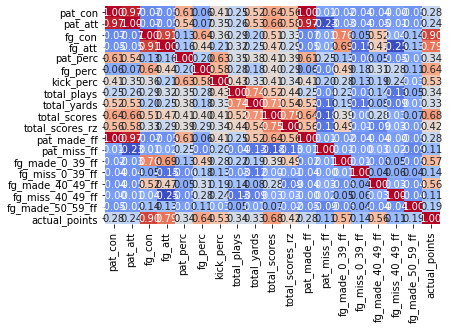

In [50]:
cor_mat(kr_df, 'kick')

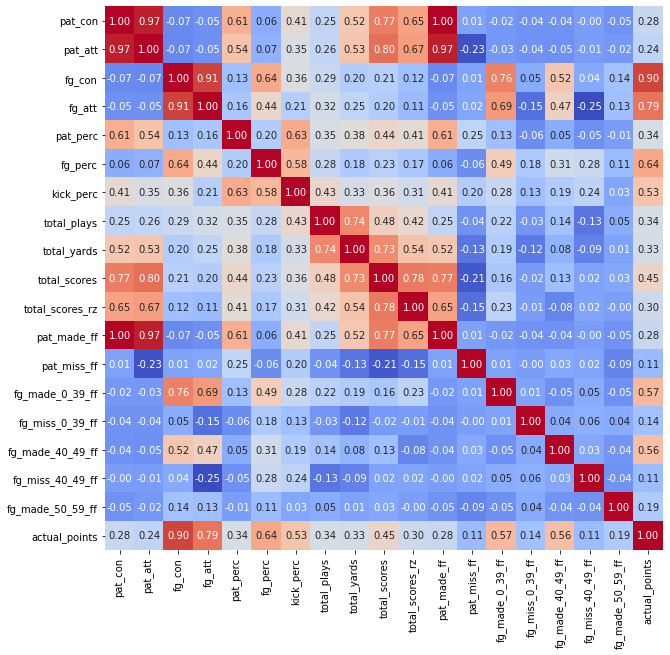

In [45]:
corr = kr_df.corr()
fig, ax = plt.subplots(figsize = (10,10))
g = sns.heatmap(corr, annot = True, fmt = '.2f', cmap = plt.get_cmap('coolwarm'), cbar = False, ax = ax)

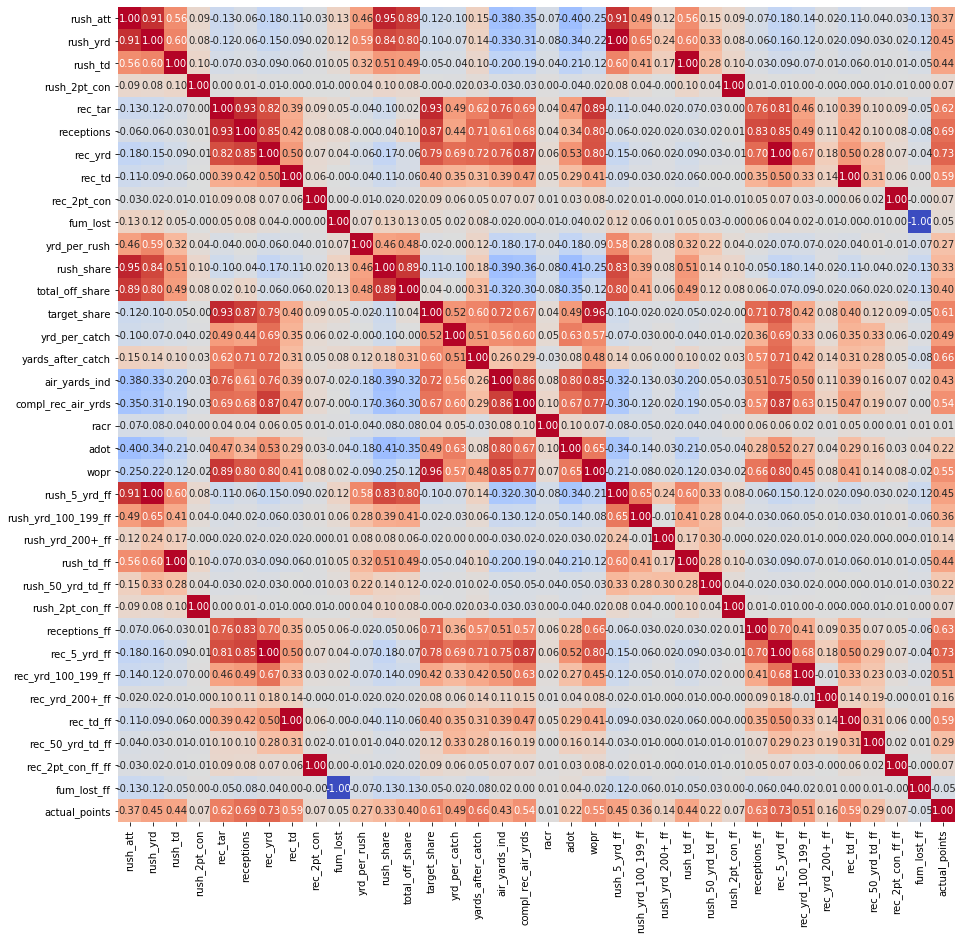

In [46]:
corr = rbwrte_df.corr()
fig, ax = plt.subplots(figsize = (15,15))
g = sns.heatmap(corr, annot = True, fmt = '.2f', cmap = plt.get_cmap('coolwarm'), cbar = False, ax = ax)